In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
df = pd.read_csv('kyphosis.csv')

In [3]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


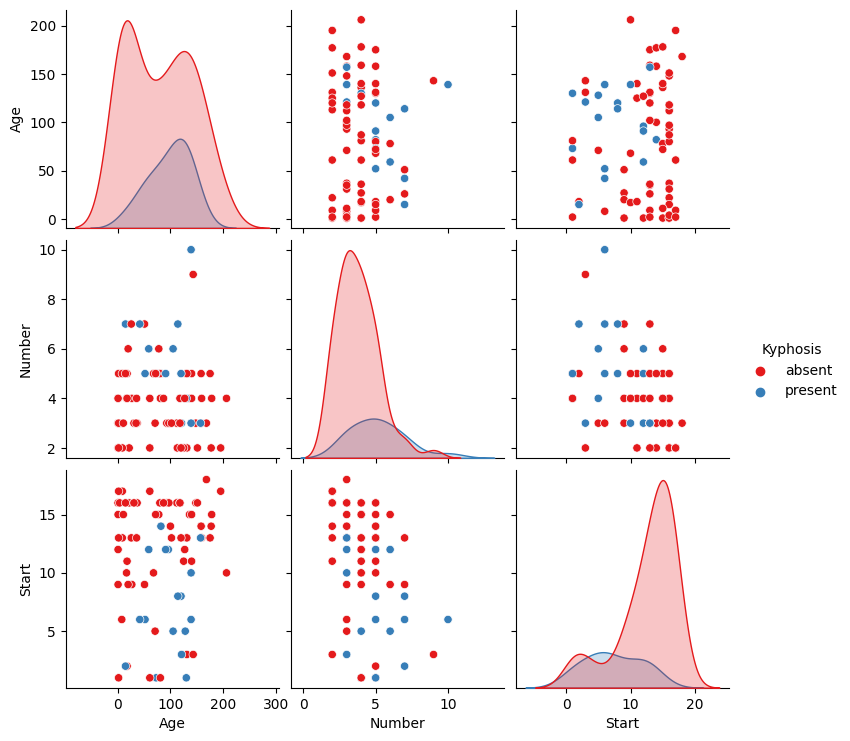

In [4]:
sns.pairplot(df,hue='Kyphosis',palette='Set1')

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X = df.drop('Kyphosis',axis=1)
y = df['Kyphosis']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [8]:
from sklearn.tree import DecisionTreeClassifier

In [9]:
dtree = DecisionTreeClassifier()

In [10]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [11]:
predictions = dtree.predict(X_test)

In [12]:
from sklearn.metrics import classification_report,confusion_matrix

In [13]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

      absent       0.79      0.83      0.81        18
     present       0.50      0.43      0.46         7

    accuracy                           0.72        25
   macro avg       0.64      0.63      0.64        25
weighted avg       0.71      0.72      0.71        25



In [14]:
print(confusion_matrix(y_test,predictions))

[[15  3]
 [ 4  3]]


In [15]:
from IPython.display import Image  
from six import StringIO
from sklearn.tree import export_graphviz
import pydot 

features = list(df.columns[1:])
features

['Age', 'Number', 'Start']

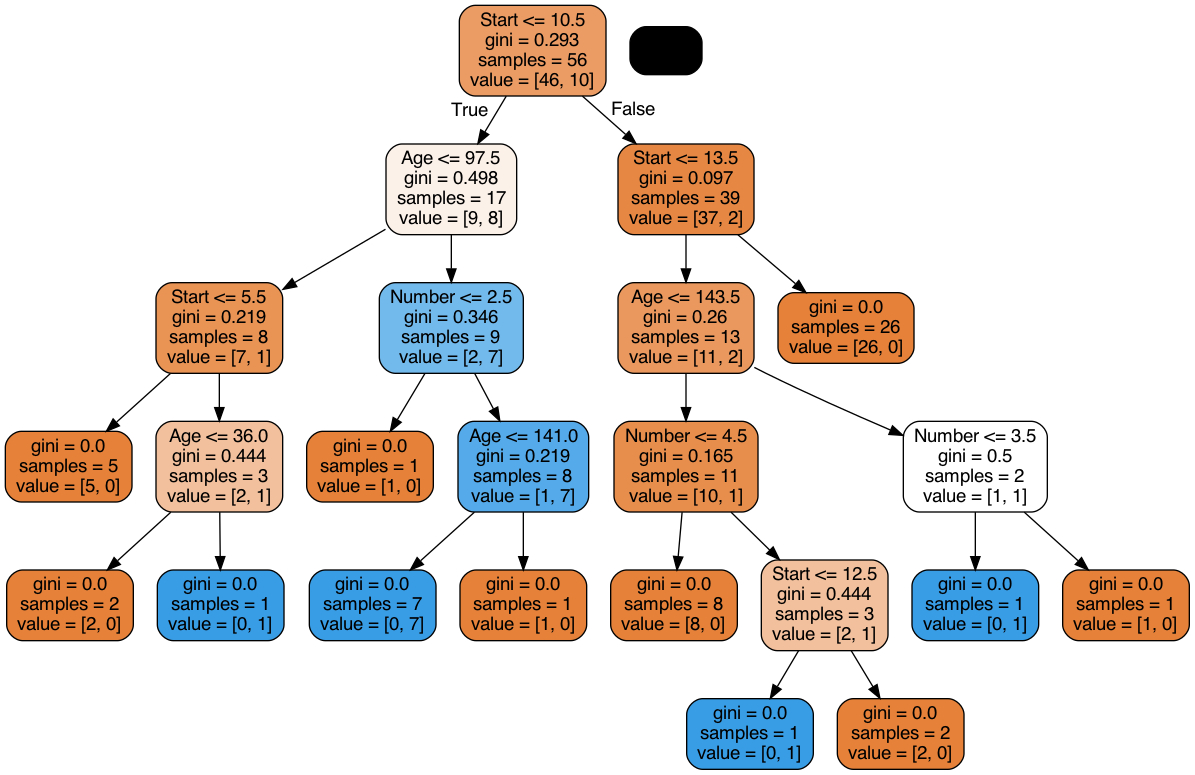

In [18]:
dot_data = StringIO()  
export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())  

In [19]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [20]:
rfc_pred = rfc.predict(X_test)

In [21]:
print(confusion_matrix(y_test,rfc_pred))

[[16  2]
 [ 5  2]]


In [22]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

      absent       0.76      0.89      0.82        18
     present       0.50      0.29      0.36         7

    accuracy                           0.72        25
   macro avg       0.63      0.59      0.59        25
weighted avg       0.69      0.72      0.69        25

